#### How often do we get no-hitters?

The number of games played between each no-hitter in the modern era (1901-2015) of Major League Baseball is stored in the array nohitter_times.

If you assume that no-hitters are described as a Poisson process, then the time between no-hitters is Exponentially distributed. As you have seen, the Exponential distribution has a single parameter, which we will call τ, the typical interval time. The value of the parameter τ that makes the exponential distribution best match the data is the mean interval time (where time is in units of number of games) between no-hitters.

Compute the value of this parameter from the data. Then, use np.random.exponential() to "repeat" the history of Major League Baseball by drawing inter-no-hitter times from an exponential distribution with the τ you found and plot the histogram as an approximation to the PDF.

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

In [26]:
nohitter_times = np.array([ 843, 1613, 1101,  215,  684,  814,  278,  324,  161,  219,  545,
        715,  966,  624,   29,  450,  107,   20,   91, 1325,  124, 1468,
        104, 1309,  429,   62, 1878, 1104,  123,  251,   93,  188,  983,
        166,   96,  702,   23,  524,   26,  299,   59,   39,   12,    2,
        308, 1114,  813,  887,  645, 2088,   42, 2090,   11,  886, 1665,
       1084, 2900, 2432,  750, 4021, 1070, 1765, 1322,   26,  548, 1525,
         77, 2181, 2752,  127, 2147,  211,   41, 1575,  151,  479,  697,
        557, 2267,  542,  392,   73,  603,  233,  255,  528,  397, 1529,
       1023, 1194,  462,  583,   37,  943,  996,  480, 1497,  717,  224,
        219, 1531,  498,   44,  288,  267,  600,   52,  269, 1086,  386,
        176, 2199,  216,   54,  675, 1243,  463,  650,  171,  327,  110,
        774,  509,    8,  197,  136,   12, 1124,   64,  380,  811,  232,
        192,  731,  715,  226,  605,  539, 1491,  323,  240,  179,  702,
        156,   82, 1397,  354,  778,  603, 1001,  385,  986,  203,  149,
        576,  445,  180, 1403,  252,  675, 1351, 2983, 1568,   45,  899,
       3260, 1025,   31,  100, 2055, 4043,   79,  238, 3931, 2351,  595,
        110,  215,    0,  563,  206,  660,  242,  577,  179,  157,  192,
        192, 1848,  792, 1693,   55,  388,  225, 1134, 1172, 1555,   31,
       1582, 1044,  378, 1687, 2915,  280,  765, 2819,  511, 1521,  745,
       2491,  580, 2072, 6450,  578,  745, 1075, 1103, 1549, 1520,  138,
       1202,  296,  277,  351,  391,  950,  459,   62, 1056, 1128,  139,
        420,   87,   71,  814,  603, 1349,  162, 1027,  783,  326,  101,
        876,  381,  905,  156,  419,  239,  119,  129,  467])

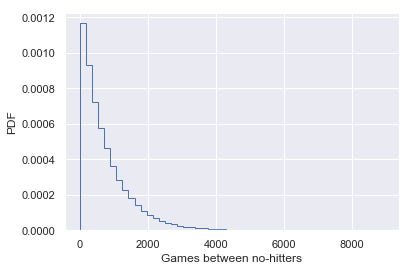

In [27]:
# Seed random number generator
np.random.seed(42)

# Compute mean no-hitter time: tau
tau = np.mean(nohitter_times)

# Draw out of an exponential distribution with parameter tau: inter_nohitter_time
inter_nohitter_time = np.random.exponential(tau, 100000)

# Plot the PDF and label axes
_ = plt.hist(inter_nohitter_time,
             bins = 50, density = True, histtype = 'step')
_ = plt.xlabel('Games between no-hitters')
_ = plt.ylabel('PDF')

# Show the plot
plt.show()


#### Do the data follow our story?

You have modeled no-hitters using an Exponential distribution. Create an ECDF of the real data. Overlay the theoretical CDF with the ECDF from the data. This helps you to verify that the Exponential distribution describes the observed data.

In [28]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

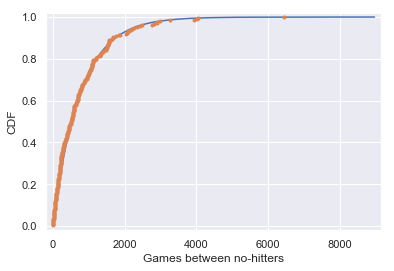

In [29]:
# Create an ECDF from real data: x, y
x, y = ecdf(nohitter_times)

# Create a CDF from theoretical samples: x_theor, y_theor
x_theor, y_theor = ecdf(inter_nohitter_time)

# Overlay the plots
plt.plot(x_theor, y_theor)
plt.plot(x, y, marker='.', linestyle='none')

# Margins and axis labels
plt.margins(0.02)
plt.xlabel('Games between no-hitters')
plt.ylabel('CDF')

# Show the plot
plt.show()


It looks like no-hitters in the modern era of Major League Baseball are Exponentially distributed. Based on the story of the Exponential distribution, this suggests that they are a random process; when a no-hitter will happen is independent of when the last no-hitter was.

#### How is this parameter optimal?

Now sample out of an exponential distribution with τ being twice as large as the optimal τ. Do it again for τ half as large. Make CDFs of these samples and overlay them with your data. You can see that they do not reproduce the data as well. Thus, the τ you computed from the mean inter-no-hitter times is optimal in that it best reproduces the data.

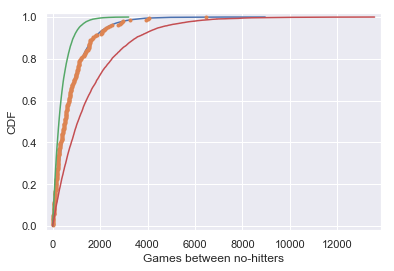

In [30]:
# Plot the theoretical CDFs
plt.plot(x_theor, y_theor)
plt.plot(x, y, marker='.', linestyle='none')
plt.margins(0.02)
plt.xlabel('Games between no-hitters')
plt.ylabel('CDF')

# Take samples with half tau: samples_half
samples_half = np.random.exponential(tau/2, 10000)

# Take samples with double tau: samples_double
samples_double = np.random.exponential(tau*2, 10000)

# Generate CDFs from these samples
x_half, y_half = ecdf(samples_half)
x_double, y_double = ecdf(samples_double)

# Plot these CDFs as lines
_ = plt.plot(x_half, y_half)
_ = plt.plot(x_double, y_double)

# Show the plot
plt.show()

Notice how the value of tau given by the mean matches the data best. In this way, tau is an optimal parameter.

#### EDA of literacy/fertility data

In the next few exercises, we will look at the correlation between female literacy and fertility (defined as the average number of children born per woman) throughout the world. For ease of analysis and interpretation, we will work with the illiteracy rate.

It is always a good idea to do some EDA ahead of our analysis. To this end, plot the fertility versus illiteracy and compute the Pearson correlation coefficient. The Numpy array illiteracy has the illiteracy rate among females for most of the world's nations. The array fertility has the corresponding fertility data.

In [31]:
def pearson_r(x, y):
    """Compute Pearson correlation coefficient between two arrays."""
    # Compute correlation matrix: corr_mat
    corr_mat = np.corrcoef(x, y)

    # Return entry [0,1]
    return corr_mat[0,1]

In [32]:
all_fert_ill = pd.read_csv("female_literacy_fertility.csv")

In [33]:
illiteracy = 100 - all_fert_ill['female literacy']

In [34]:
fertility = all_fert_ill['fertility']

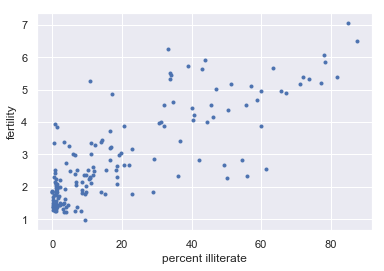

0.8041324026815344


In [35]:
# Plot the illiteracy rate versus fertility
_ = plt.plot(illiteracy, fertility, marker='.', linestyle='none')

# Set the margins and label axes
plt.margins()
_ = plt.xlabel('percent illiterate')
_ = plt.ylabel('fertility')

# Show the plot
plt.show()

# Show the Pearson correlation coefficient
print(pearson_r(illiteracy, fertility))

You can see the correlation between illiteracy and fertility by eye, and by the substantial Pearson correlation coefficient of 0.8. It is difficult to resolve in the scatter plot, but there are many points around near-zero illiteracy and about 1.8 children/woman.

#### Linear regression

We will assume that fertility is a linear function of the female illiteracy rate. That is, f=ai+b, where a is the slope and b is the intercept. We can think of the intercept as the minimal fertility rate, probably somewhere between one and two. The slope tells us how the fertility rate varies with illiteracy. We can find the best fit line using np.polyfit().

Plot the data and the best fit line. Print out the slope and intercept. (Think: what are their units?)

slope = 0.04979854809063423 children per woman / percent illiterate
intercept = 1.888050610636557 children per woman


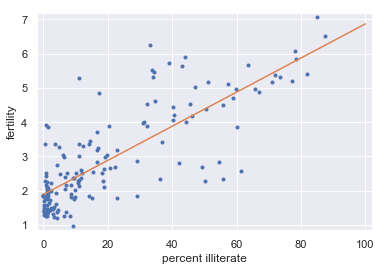

In [36]:
# Plot the illiteracy rate versus fertility
_ = plt.plot(illiteracy, fertility, marker='.', linestyle='none')
plt.margins(0.02)
_ = plt.xlabel('percent illiterate')
_ = plt.ylabel('fertility')

# Perform a linear regression using np.polyfit(): a, b
a, b = np.polyfit(illiteracy, fertility, 1)

# Print the results to the screen
print('slope =', a, 'children per woman / percent illiterate')
print('intercept =', b, 'children per woman')

# Make theoretical line to plot
x = np.array([0, 100])
y = a * x + b

# Add regression line to your plot
_ = plt.plot(x, y)

# Draw the plot
plt.show()

#### How is it optimal?

The function np.polyfit() that you used to get your regression parameters finds the optimal slope and intercept. It is optimizing the sum of the squares of the residuals, also known as RSS (for residual sum of squares). In this exercise, you will plot the function that is being optimized, the RSS, versus the slope parameter a. To do this, fix the intercept to be what you found in the optimization. Then, plot the RSS vs. the slope. Where is it minimal?

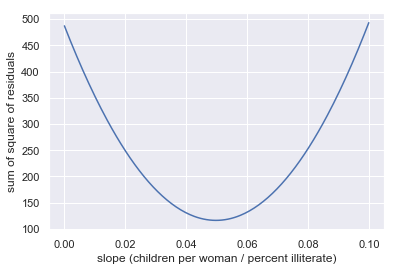

In [37]:
# Specify slopes to consider: a_vals
a_vals = np.linspace(0, 0.1, 200)

# Initialize sum of square of residuals: rss
# The empty_like() function returns a new array with the same shape and type as a given array 
rss = np.empty_like(a_vals)

# Compute sum of square of residuals for each value of a_vals
for i, a in enumerate(a_vals):
    rss[i] = np.sum((fertility - a*illiteracy - b)**2)

# Plot the RSS
# Hint: the RSS is given by np.sum((y_data - a * x_data - b)**2)
plt.plot(a_vals, rss, '-')
plt.xlabel('slope (children per woman / percent illiterate)')
plt.ylabel('sum of square of residuals')

plt.show()

Notice that the minimum on the plot, that is the value of the slope that gives the minimum sum of the square of the residuals, is the same value you got when performing the regression.

In [38]:
x = np.array([10.,  8., 13.,  9., 11., 14.,  6.,  4., 12.,  7.,  5.])
y = np.array([ 8.04,  6.95,  7.58,  8.81,  8.33,  9.96,  7.24,  4.26, 10.84,
        4.82,  5.68])

#### Linear regression on appropriate Anscombe data

For practice, perform a linear regression on the data set from Anscombe's quartet that is most reasonably interpreted with linear regression.

0.5000909090909095 3.0000909090909076


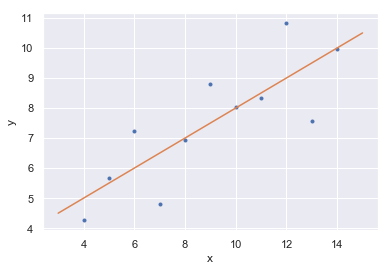

In [39]:
# Perform linear regression: a, b
a, b = np.polyfit(x, y, 1)

# Print the slope and intercept
print(a, b)

# Generate theoretical x and y data: x_theor, y_theor
# x is 3,15 because that's the max x data from the anscombe dataset
x_theor = np.array([3, 15])
y_theor = a*x_theor + b

# Plot the Anscombe data and theoretical line
_ = plt.plot(x, y, marker = '.', linestyle = 'none')
_ = plt.plot(x_theor, y_theor)

# Label the axes
plt.xlabel('x')
plt.ylabel('y')

# Show the plot
plt.show()

Now, to verify that all four of the Anscombe data sets have the same slope and intercept from a linear regression, you will compute the slope and intercept for each set. The data are stored in lists; anscombe_x = [x1, x2, x3, x4] and anscombe_y = [y1, y2, y3, y4], where, for example, x2 and y2 are the x and y values for the second Anscombe data set.

In [41]:
anscombe_x = [np.array([10.,  8., 13.,  9., 11., 14.,  6.,  4., 12.,  7.,  5.]),
 np.array([10.,  8., 13.,  9., 11., 14.,  6.,  4., 12.,  7.,  5.]),
 np.array([10.,  8., 13.,  9., 11., 14.,  6.,  4., 12.,  7.,  5.]),
 np.array([ 8.,  8.,  8.,  8.,  8.,  8.,  8., 19.,  8.,  8.,  8.])]

In [42]:
anscombe_y = [np.array([ 8.04,  6.95,  7.58,  8.81,  8.33,  9.96,  7.24,  4.26, 10.84,
         4.82,  5.68]),
 np.array([9.14, 8.14, 8.74, 8.77, 9.26, 8.1 , 6.13, 3.1 , 9.13, 7.26, 4.74]),
 np.array([ 7.46,  6.77, 12.74,  7.11,  7.81,  8.84,  6.08,  5.39,  8.15,
         6.42,  5.73]),
 np.array([ 6.58,  5.76,  7.71,  8.84,  8.47,  7.04,  5.25, 12.5 ,  5.56,
         7.91,  6.89])]

In [43]:
# Iterate through x,y pairs
for x, y in zip(anscombe_x, anscombe_y):
    # Compute the slope and intercept: a, b
    a, b = np.polyfit(x, y, 1)

    # Print the result
    print('slope:', a, 'intercept:', b)

slope: 0.5000909090909095 intercept: 3.0000909090909076
slope: 0.5000000000000004 intercept: 3.000909090909089
slope: 0.4997272727272731 intercept: 3.0024545454545453
slope: 0.49990909090909064 intercept: 3.0017272727272735


Indeed, they all have the same slope and intercept!!

### Bootstrapping

#### Visualizing bootstrap samples
In this exercise, you will generate bootstrap samples from the set of annual rainfall data measured at the Sheffield Weather Station in the UK from 1883 to 2015. The data are stored in the NumPy array rainfall in units of millimeters (mm). By graphically displaying the bootstrap samples with an ECDF, you can get a feel for how bootstrap sampling allows probabilistic descriptions of data.

In [45]:
rainfall = np.array([ 875.5,  648.2,  788.1,  940.3,  491.1,  743.5,  730.1,  686.5,
        878.8,  865.6,  654.9,  831.5,  798.1,  681.8,  743.8,  689.1,
        752.1,  837.2,  710.6,  749.2,  967.1,  701.2,  619. ,  747.6,
        803.4,  645.6,  804.1,  787.4,  646.8,  997.1,  774. ,  734.5,
        835. ,  840.7,  659.6,  828.3,  909.7,  856.9,  578.3,  904.2,
        883.9,  740.1,  773.9,  741.4,  866.8,  871.1,  712.5,  919.2,
        927.9,  809.4,  633.8,  626.8,  871.3,  774.3,  898.8,  789.6,
        936.3,  765.4,  882.1,  681.1,  661.3,  847.9,  683.9,  985.7,
        771.1,  736.6,  713.2,  774.5,  937.7,  694.5,  598.2,  983.8,
        700.2,  901.3,  733.5,  964.4,  609.3, 1035.2,  718. ,  688.6,
        736.8,  643.3, 1038.5,  969. ,  802.7,  876.6,  944.7,  786.6,
        770.4,  808.6,  761.3,  774.2,  559.3,  674.2,  883.6,  823.9,
        960.4,  877.8,  940.6,  831.8,  906.2,  866.5,  674.1,  998.1,
        789.3,  915. ,  737.1,  763. ,  666.7,  824.5,  913.8,  905.1,
        667.8,  747.4,  784.7,  925.4,  880.2, 1086.9,  764.4, 1050.1,
        595.2,  855.2,  726.9,  785.2,  948.8,  970.6,  896. ,  618.4,
        572.4, 1146.4,  728.2,  864.2,  793. ])

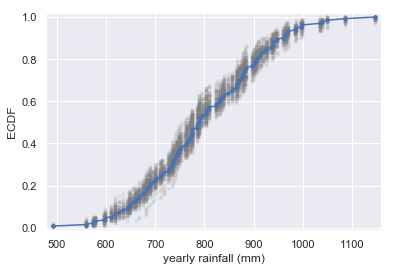

In [46]:
for _ in range(50):
    # Generate bootstrap sample: bs_sample
    bs_sample = np.random.choice(rainfall, size=len(rainfall))

    # Compute and plot ECDF from bootstrap sample
    x, y = ecdf(bs_sample)
    _ = plt.plot(x, y, marker='.', linestyle='none',
                 color='gray', alpha=0.1)

# Compute and plot ECDF from original data
x, y = ecdf(rainfall)
_ = plt.plot(x, y, marker='.')

# Make margins and label axes
plt.margins(0.02)
_ = plt.xlabel('yearly rainfall (mm)')
_ = plt.ylabel('ECDF')

# Show the plot
plt.show()

Notice how the bootstrap samples give an idea of how the distribution of rainfalls is spread

In [47]:
def bootstrap_replicate_1d(data, func):
    return func(np.random.choice(data, size=len(data)))

In [48]:
def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data, func)

    return bs_replicates


In this exercise, you will compute a bootstrap estimate of the probability density function of the mean annual rainfall at the Sheffield Weather Station. Remember, we are estimating the mean annual rainfall we would get if the Sheffield Weather Station could repeat all of the measurements from 1883 to 2015 over and over again. This is a probabilistic estimate of the mean. You will plot the PDF as a histogram, and you will see that it is Normal.

In fact, it can be shown theoretically that under not-too-restrictive conditions, the value of the mean will always be Normally distributed. (This does not hold in general, just for the mean and a few other statistics.) The standard deviation of this distribution, called the standard error of the mean, or SEM, is given by the standard deviation of the data divided by the square root of the number of data points. I.e., for a data set, sem = np.std(data) / np.sqrt(len(data)). Using hacker statistics, you get this same result without the need to derive it, but you will verify this result from your bootstrap replicates.

10.510549150506188
10.501930154084782


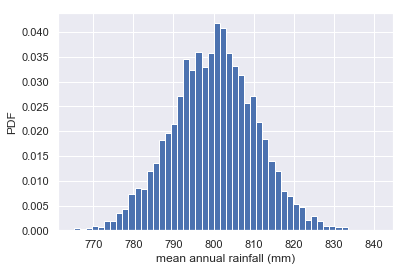

In [51]:
# Take 10,000 bootstrap replicates of the mean: bs_replicates
bs_replicates = draw_bs_reps(rainfall, np.mean, 10000)

# Compute and print SEM
sem = np.std(rainfall) / np.sqrt(len(rainfall))
print(sem)

# Compute and print standard deviation of bootstrap replicates
bs_std = np.std(bs_replicates)
print(bs_std)

# Make a histogram of the results
_ = plt.hist(bs_replicates, bins=50, density=True)
_ = plt.xlabel('mean annual rainfall (mm)')
_ = plt.ylabel('PDF')

# Show the plot
plt.show()

Notice that the SEM we got from the known expression and the bootstrap replicates is the same and the distribution of the bootstrap replicates of the mean is Normal.

A confidence interval gives upper and lower bounds on the range of parameter values you might expect to get if we repeat our measurements. For named distributions, you can compute them analytically or look them up, but one of the many beautiful properties of the bootstrap method is that you can take percentiles of your bootstrap replicates to get your confidence interval. Conveniently, you can use the np.percentile() function.

Use the bootstrap replicates you just generated to compute the 95% confidence interval. That is, give the 2.5th and 97.5th percentile of your bootstrap replicates stored as bs_replicates. What is the 95% confidence interval?

In [50]:
np.percentile(bs_replicates, 2.5), np.percentile(bs_replicates, 97.5)

(779.9690037593984, 820.627932330827)

We saw in a previous exercise that the mean is Normally distributed. This does not necessarily hold for other statistics, but no worry: as hackers, we can always take bootstrap replicates! In this exercise, you'll generate bootstrap replicates for the variance of the annual rainfall at the Sheffield Weather Station and plot the histogram of the replicates.

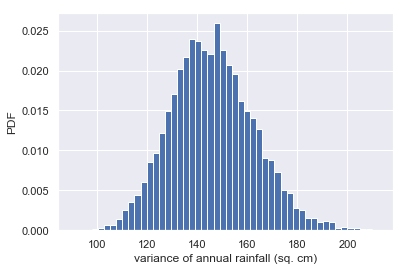

In [53]:
# Generate 10,000 bootstrap replicates of the variance: bs_replicates
bs_replicates = draw_bs_reps(rainfall, np.var, 10000)

# Put the variance in units of square centimeters
bs_replicates = bs_replicates/100

# Make a histogram of the results
_ = plt.hist(bs_replicates, density=True, bins = 50)
_ = plt.xlabel('variance of annual rainfall (sq. cm)')
_ = plt.ylabel('PDF')

# Show the plot
plt.show()

This is not normally distributed, as it has a longer tail to the right. Note that you can also compute a confidence interval on the variance, or any other statistic, using np.percentile() with your bootstrap replicates

Consider again the inter-no-hitter intervals for the modern era of baseball. Generate 10,000 bootstrap replicates of the optimal parameter τ. Plot a histogram of your replicates and report a 95% confidence interval.

95% confidence interval = [663.78675299 867.87260956] games


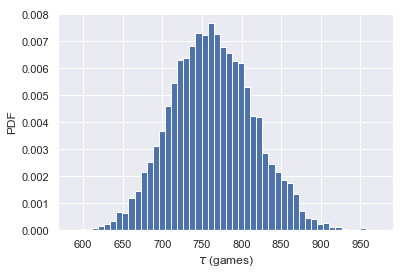

In [55]:
# Draw bootstrap replicates of the mean no-hitter time (equal to tau): bs_replicates
bs_replicates = draw_bs_reps(nohitter_times, np.mean, 10000)

# Compute the 95% confidence interval: conf_int
conf_int = np.percentile(bs_replicates, [2.5, 97.5])

# Print the confidence interval
print('95% confidence interval =', conf_int, 'games')

# Plot the histogram of the replicates
_ = plt.hist(bs_replicates, bins=50, density=True)
_ = plt.xlabel(r'$\tau$ (games)')
_ = plt.ylabel('PDF')

# Show the plot
plt.show()

This gives you an estimate of what the typical time between no-hitters is. It could be anywhere between 660 and 870 games.